# **Maths Project**

In [ ]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("viridis")

In [ ]:
install.packages("DataExplorer")

In [ ]:
install.packages("sf")

In [ ]:
library(dplyr)
library(ggplot2)
library(viridis)

In [ ]:
library(dplyr)
library(ggplot2)

In [ ]:
library(sf)

In [7]:
library(DataExplorer)

## **Preprocessing Data**

In [9]:
df <- read.csv("Missing Cases Complied (2017-2021).csv")

In [10]:
head(df)

,S..No,Year,Category,State.UT,Unrecovered.Untraced.Persons.from.Previous.years...Male,Unrecovered.Untraced.Persons.from.Previous.years...Female,Unrecovered.Untraced.Persons.from.Previous.years...Trans,Unrecovered.Untraced.Persons.from.Previous.years...Total,Persons.Missing.this.year...Male,Persons.Missing.this.year...Female,⋯,Total.Recovered.Traced.this.year...Trans,Total.Recovered.Traced.this.year...Total,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Male,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Female,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Trans,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Male,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Female,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Trans,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,1,2017,State,Andhra Pradesh,4173,2990,5,7168,3114,5225,⋯,7,10177,51.4,78.2,58.3,65.6,3540,1792,5,5337
2,2,2017,State,Arunachal Pradesh,2,93,0,95,9,90,⋯,0,103,63.6,52.5,NA,53.1,4,87,0,91
3,3,2017,State,Assam,530,1223,0,1753,997,2302,⋯,0,3329,66.5,65.6,NA,65.9,512,1211,0,1723
4,4,2017,State,Bihar,1523,2935,86,4544,1932,6020,⋯,104,4710,30.2,39.8,44.8,37.3,2410,5394,128,7932
5,5,2017,State,Chhattisgarh,4366,5836,0,10202,3449,7383,⋯,0,9446,37.7,49.2,NA,44.9,4870,6718,0,11588
6,6,2017,State,Goa,475,230,0,705,304,274,⋯,0,515,33.5,50.4,NA,40.1,518,250,0,768


In [11]:
dim(df)  #Dimensions of Dataset

[1] 180  28

In [12]:
df[is.na(df)]=0  # Assigning missing values 0 value

In [13]:
View(summary(df))

     S..No             Year        Category           State.UT        
 Min.   :  1.00   Min.   :2017   Length:180         Length:180        
 1st Qu.: 45.75   1st Qu.:2018   Class :character   Class :character  
 Median : 90.50   Median :2019   Mode  :character   Mode  :character  
 Mean   : 90.50   Mean   :2019                                        
 3rd Qu.:135.25   3rd Qu.:2020                                        
 Max.   :180.00   Max.   :2021                                        
 Unrecovered.Untraced.Persons.from.Previous.years...Male
 Min.   :    0                                          
 1st Qu.:   56                                          
 Median : 1258                                          
 Mean   : 3893                                          
 3rd Qu.: 5185                                          
 Max.   :28778                                          
 Unrecovered.Untraced.Persons.from.Previous.years...Female
 Min.   :    0.00                            

In [14]:
str(df)

'data.frame':	180 obs. of  28 variables:
 $ S..No                                                                                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Year                                                                                      : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ Category                                                                                  : chr  "State" "State" "State" "State" ...
 $ State.UT                                                                                  : chr  "Andhra Pradesh" "Arunachal Pradesh" "Assam" "Bihar" ...
 $ Unrecovered.Untraced.Persons.from.Previous.years...Male                                   : int  4173 2 530 1523 4366 475 4174 4229 785 1935 ...
 $ Unrecovered.Untraced.Persons.from.Previous.years...Female                                 : int  2990 93 1223 2935 5836 230 4240 3641 506 1360 ...
 $ Unrecovered.Untraced.Persons.from.Previous.years...Trans                              

In [15]:
head(df)

,S..No,Year,Category,State.UT,Unrecovered.Untraced.Persons.from.Previous.years...Male,Unrecovered.Untraced.Persons.from.Previous.years...Female,Unrecovered.Untraced.Persons.from.Previous.years...Trans,Unrecovered.Untraced.Persons.from.Previous.years...Total,Persons.Missing.this.year...Male,Persons.Missing.this.year...Female,⋯,Total.Recovered.Traced.this.year...Trans,Total.Recovered.Traced.this.year...Total,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Male,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Female,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Trans,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Male,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Female,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Trans,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,1,2017,State,Andhra Pradesh,4173,2990,5,7168,3114,5225,⋯,7,10177,51.4,78.2,58.3,65.6,3540,1792,5,5337
2,2,2017,State,Arunachal Pradesh,2,93,0,95,9,90,⋯,0,103,63.6,52.5,0.0,53.1,4,87,0,91
3,3,2017,State,Assam,530,1223,0,1753,997,2302,⋯,0,3329,66.5,65.6,0.0,65.9,512,1211,0,1723
4,4,2017,State,Bihar,1523,2935,86,4544,1932,6020,⋯,104,4710,30.2,39.8,44.8,37.3,2410,5394,128,7932
5,5,2017,State,Chhattisgarh,4366,5836,0,10202,3449,7383,⋯,0,9446,37.7,49.2,0.0,44.9,4870,6718,0,11588
6,6,2017,State,Goa,475,230,0,705,304,274,⋯,0,515,33.5,50.4,0.0,40.1,518,250,0,768


In [ ]:
DataExplorer::create_report(df)  #Creating Report using DataExplorer



processing file: report.rmd



output file: /content/report.knit.md




/usr/bin/pandoc +RTS -K512m -RTS /content/report.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /content/report.html --lua-filter /usr/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --variable bs3=TRUE --section-divs --table-of-contents --toc-depth 6 --template /usr/lib/R/site-library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=yeti --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /tmp/RtmpHPnX5E/rmarkdown-strf458d39c61.html 



Output created: report.html



# **Questions**

## **Q1 In which year and in which state were total maximum missing cases (male,female and trans)?**

### **Year wise**

In [37]:
gender_missing <- subset(df,select=c("Persons.Missing.this.year...Female","Persons.Missing.this.year...Male","Persons.Missing.this.year...Trans","Year"))
dim(gender_missing)
head(gender_missing)

[1] 180   4

,Persons.Missing.this.year...Female,Persons.Missing.this.year...Male,Persons.Missing.this.year...Trans,Year
,<int>,<int>,<int>,<int>
1,5225,3114,7,2017
2,90,9,0,2017
3,2302,997,0,2017
4,6020,1932,146,2017
5,7383,3449,0,2017
6,274,304,0,2017


In [ ]:
df_grp_year = gender_missing %>% group_by(Year)  %>%
                    summarise(total_missing_female = sum(Persons.Missing.this.year...Female),
                              total_missing_male = sum(Persons.Missing.this.year...Male),
                              total_missing_trans = sum(Persons.Missing.this.year...Trans),
                              .groups = 'drop')
df_grp_year

Year,total_missing_female,total_missing_male,total_missing_trans
<int>,<int>,<int>,<int>
2017,188382,116467,418
2018,223621,123339,564
2019,248397,132089,40
2020,222395,100748,27
2021,265481,124177,186


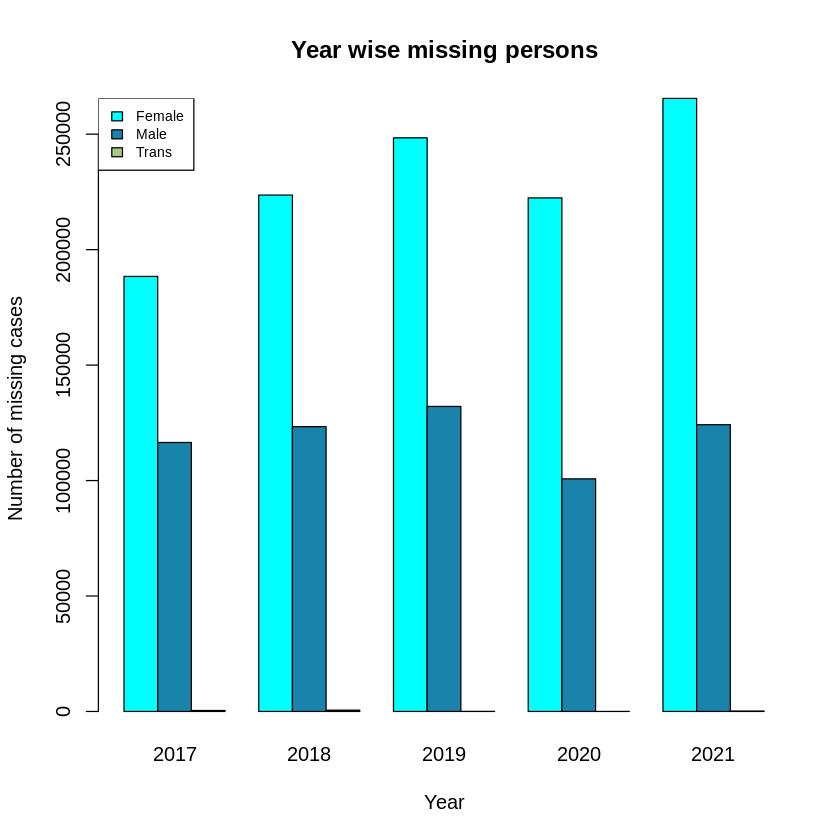

In [ ]:
colors = c("#00FFFF", "#1983AB", "#ABC782")
year <- c("2017", "2018", "2019", "2020", "2021")
gender <- c("Female", "Male", "Trans")
  
mx <- t(as.matrix(df_grp_year[-1]))
colnames(mx) <- df_grp_year$Year

barplot(mx,main = "Year wise missing persons", names.arg = year, 
                          xlab = "Year", ylab = "Number of missing cases", 
                          col = colors, beside = TRUE) 
legend("topleft", gender, cex = 0.7, fill = colors)

### **State-wise**

In [38]:
state_missing <- subset(df,select=c("Persons.Missing.this.year...Female","Persons.Missing.this.year...Male","Persons.Missing.this.year...Trans","State.UT"))
dim(state_missing)
head(state_missing)

[1] 180   4

,Persons.Missing.this.year...Female,Persons.Missing.this.year...Male,Persons.Missing.this.year...Trans,State.UT
,<int>,<int>,<int>,<chr>
1,5225,3114,7,Andhra Pradesh
2,90,9,0,Arunachal Pradesh
3,2302,997,0,Assam
4,6020,1932,146,Bihar
5,7383,3449,0,Chhattisgarh
6,274,304,0,Goa


In [39]:
df_grp_state = state_missing %>% group_by(State.UT)  %>%
                    summarise(total_missing_female = sum(Persons.Missing.this.year...Female),
                              total_missing_male = sum(Persons.Missing.this.year...Male),
                              total_missing_trans = sum(Persons.Missing.this.year...Trans),
                              .groups = 'drop')

In [40]:
new_row <- c("D&N Haveli and Daman and Diu",480,296,0)

In [41]:
df_grp_state <-df_grp_state[-c(8,9,10),]

In [42]:
df_grp_state[nrow(df_grp_state)+1,] <- list("D&N Haveli and Daman and Diu",480,296,0)

In [43]:
df_grp_state

State.UT,total_missing_female,total_missing_male,total_missing_trans
<chr>,<int>,<int>,<int>
A & N Islands,353,331,0
Andhra Pradesh,35574,17277,514
Arunachal Pradesh,156,88,0
Assam,15611,7164,20
Bihar,34679,9124,221
Chandigarh,2135,1450,1
Chhattisgarh,49125,18184,0
Delhi UT,62734,48087,3
Goa,1220,1437,0


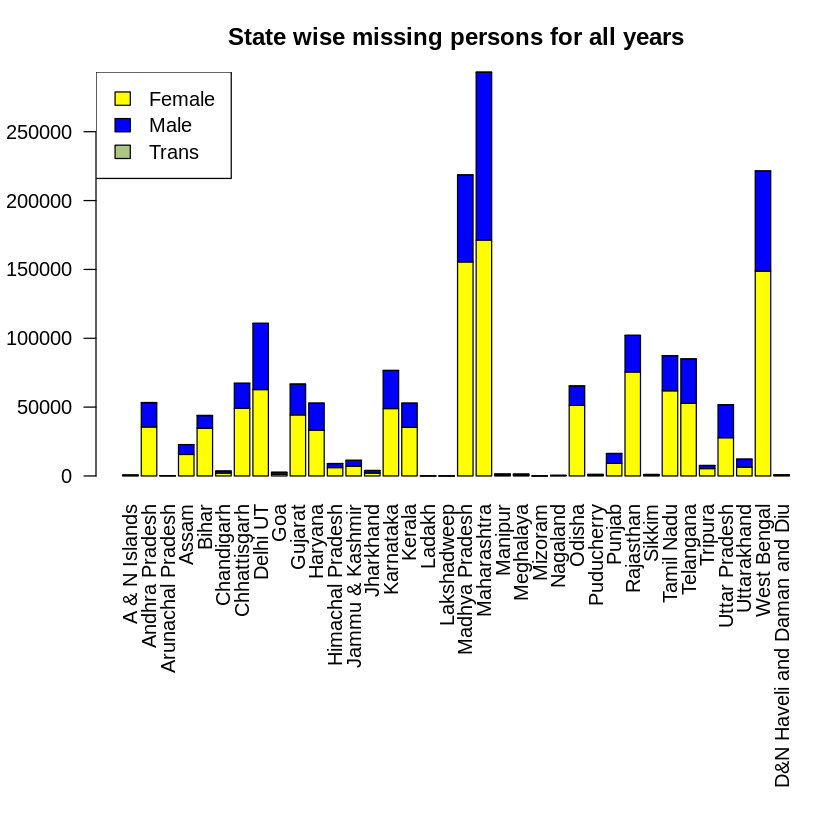

In [ ]:
colors = c("yellow", "blue", "#ABC782")
gender <- c("Female", "Male", "Trans")
state <- c("A & N Islands","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chandigarh","Chhattisgarh","Delhi UT","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu & Kashmir","Jharkhand","Karnataka","Kerala","Ladakh","Lakshadweep","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Puducherry","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","D&N Haveli and Daman and Diu")

mx <- t(as.matrix(df_grp_state[-1]))
colnames(mx) <- df_grp_state$State.UT

par(mar=c(15, 4,3,1)) 
barplot(mx, main = "State wise missing persons for all years", names.arg=state, 
                          col = colors,las=2)  
legend("topleft", gender, fill = colors)

## **Q2 ST/UT wise total recovered cases yearly based**

###**Year wise**

In [44]:
gender_recovered <- subset(df,select=c("Total.Recovered.Traced.this.year...Female","Total.Recovered.Traced.this.year...Male","Total.Recovered.Traced.this.year...Trans","Year"))
dim(gender_recovered)
head(gender_recovered)

[1] 180   4

,Total.Recovered.Traced.this.year...Female,Total.Recovered.Traced.this.year...Male,Total.Recovered.Traced.this.year...Trans,Year
,<int>,<int>,<int>,<int>
1,6423,3747,7,2017
2,96,7,0,2017
3,2314,1015,0,2017
4,3561,1045,104,2017
5,6501,2945,0,2017
6,254,261,0,2017


In [ ]:
rec_grp_year = gender_recovered %>% group_by(Year)  %>%
                    summarise(total_recovered_female = sum(Total.Recovered.Traced.this.year...Female),
                              total_recovered_male = sum(Total.Recovered.Traced.this.year...Male),
                              total_recovered_trans = sum(Total.Recovered.Traced.this.year...Trans),
                              .groups = 'drop')
rec_grp_year

Year,total_recovered_female,total_recovered_male,total_recovered_trans
<int>,<int>,<int>,<int>
2017,200357,120435,346
2018,209852,122384,518
2019,222949,125558,101
2020,224043,108298,142
2021,261278,123716,130


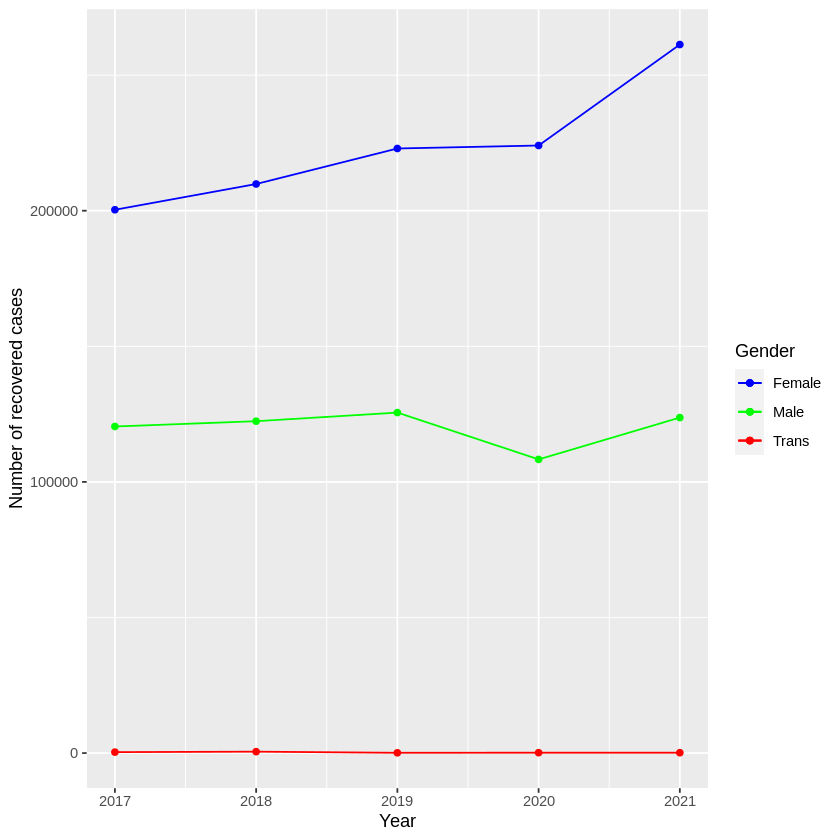

In [ ]:
p<-ggplot(rec_grp_year, aes(x=Year)) +
  geom_line(aes(y=total_recovered_female,color="blue"))+
  geom_point(aes(y=total_recovered_female,color="blue")) +
  geom_line(aes(y=total_recovered_male,color="green")) +
  geom_point(aes(y=total_recovered_male,color="green")) +
  geom_line(aes(y=total_recovered_trans,color="red")) +
  geom_point(aes(y=total_recovered_trans,color="red")) +
  labs(x="Year",y="Number of recovered cases") +
  scale_y_continuous(labels = function(x) format(x, scientific=FALSE)) +
  scale_color_manual(labels = c("Female", "Male","Trans"), values = c("blue","green","red"),name="Gender")

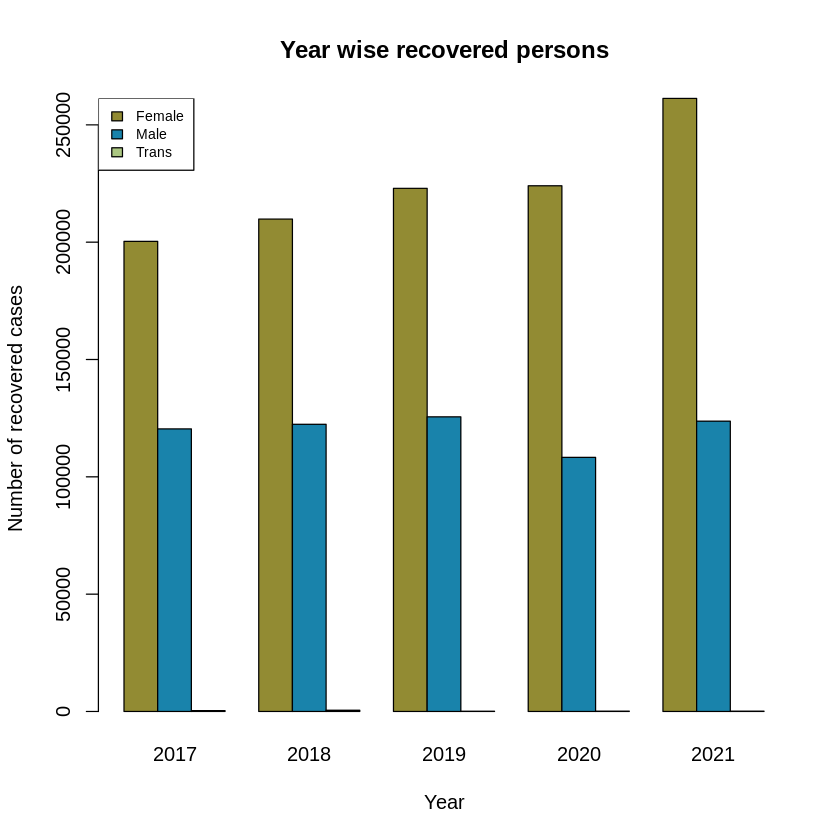

In [ ]:
colors = c("#928B33", "#1983AB", "#ABC782")
year <- c("2017", "2018", "2019", "2020", "2021")
gender <- c("Female", "Male", "Trans")
  
mx <- t(as.matrix(rec_grp_year[-1]))
colnames(mx) <- rec_grp_year$Year

barplot(mx, main = "Year wise recovered persons", names.arg = year, 
                          xlab = "Year", ylab = "Number of recovered cases", 
                          col = colors, beside = TRUE)  
legend("topleft", gender, cex = 0.7, fill = colors)

### **State-wise**

In [46]:
state_recovered <- subset(df,select=c("Total.Recovered.Traced.this.year...Female","Total.Recovered.Traced.this.year...Male","Total.Recovered.Traced.this.year...Trans","State.UT"))
dim(state_recovered)
head(state_recovered)

[1] 180   4

,Total.Recovered.Traced.this.year...Female,Total.Recovered.Traced.this.year...Male,Total.Recovered.Traced.this.year...Trans,State.UT
,<int>,<int>,<int>,<chr>
1,6423,3747,7,Andhra Pradesh
2,96,7,0,Arunachal Pradesh
3,2314,1015,0,Assam
4,3561,1045,104,Bihar
5,6501,2945,0,Chhattisgarh
6,254,261,0,Goa


In [47]:
rec_grp_state = state_recovered %>% group_by(State.UT)  %>%
                    summarise(total_recovered_female = sum(Total.Recovered.Traced.this.year...Female),
                              total_recovered_male = sum(Total.Recovered.Traced.this.year...Male),
                              total_recovered_trans = sum(Total.Recovered.Traced.this.year...Trans),
                              .groups = 'drop')

In [48]:
new_row <- c("D&N Haveli and Daman and Diu",488,282,0)

In [49]:
rec_grp_state <-rec_grp_state[-c(8,9,10),]

In [50]:
rec_grp_state[nrow(rec_grp_state)+1,] <- list("D&N Haveli and Daman and Diu",488,282,0)

In [51]:
rec_grp_state

State.UT,total_recovered_female,total_recovered_male,total_recovered_trans
<chr>,<int>,<int>,<int>
A & N Islands,270,207,0
Andhra Pradesh,35859,17968,514
Arunachal Pradesh,247,56,0
Assam,15687,6912,120
Bihar,29493,8230,138
Chandigarh,1664,1147,1
Chhattisgarh,43756,16394,0
Delhi UT,61511,49480,3
Goa,1189,1303,0


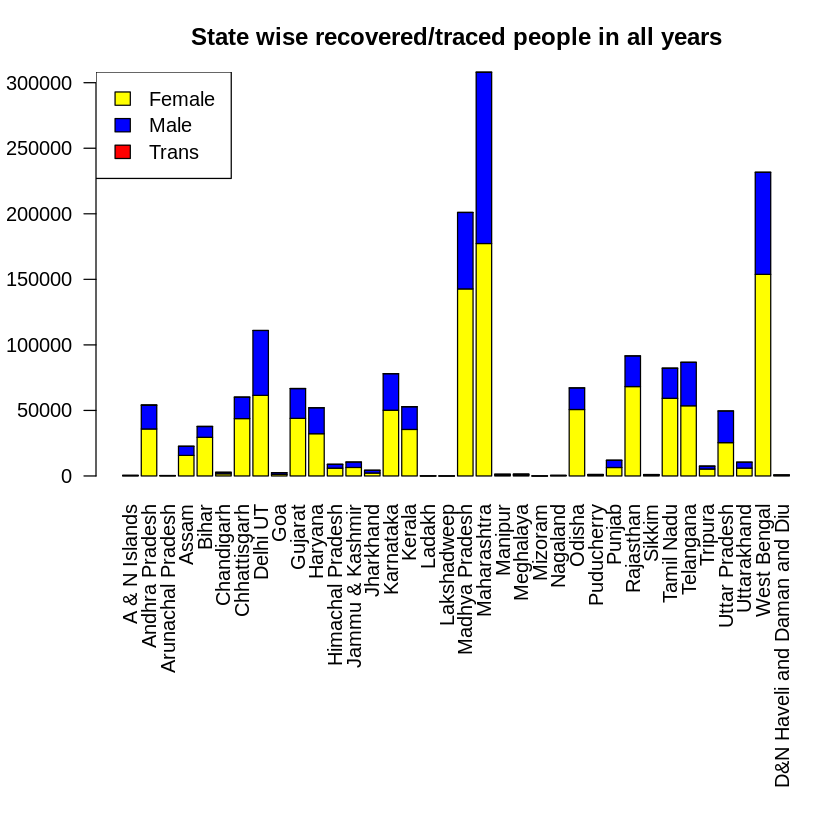

In [ ]:
colors = c("yellow", "blue", "red")
gender <- c("Female", "Male", "Trans")
state <- c("A & N Islands","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chandigarh","Chhattisgarh","Delhi UT","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu & Kashmir","Jharkhand","Karnataka","Kerala","Ladakh","Lakshadweep","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Puducherry","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","D&N Haveli and Daman and Diu")

mx <- t(as.matrix(rec_grp_state[-1]))
colnames(mx) <- rec_grp_state$State.UT

par(mar=c(15, 4,3,1))
barplot(mx, main = "State wise recovered/traced people in all years", names.arg=state, 
                          col = colors,las=2)
legend("topleft", gender, fill = colors)

## **Q3 Identify the states with recovery rate less than 60%?** 

In [52]:
low_recovery <- subset(df,select=c("Year","State.UT","Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total"),Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total<60)
dim(low_recovery)
head(low_recovery)
low_recovery_2021 <- subset(low_recovery,Year==2021)

[1] 108   3

,Year,State.UT,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total
,<int>,<chr>,<dbl>
2,2017,Arunachal Pradesh,53.1
4,2017,Bihar,37.3
5,2017,Chhattisgarh,44.9
6,2017,Goa,40.1
8,2017,Haryana,53.5
9,2017,Himachal Pradesh,57.6


In [55]:
colnames(low_recovery_2021)[2] <- "Name"

In [56]:
low_recovery_2021$Name[low_recovery_2021$Name== "A & N Islands"] <- "Andaman & Nicobar" 
low_recovery_2021$Name[low_recovery_2021$Name=="Delhi UT"] <- "Delhi"
low_recovery_2021$Name[low_recovery_2021$Name=="Chhattisgarh"] <- "Chhattishgarh"
low_recovery_2021$Name[low_recovery_2021$Name=="D&N Haveli and Daman and Diu"] <- "Daman and Diu and Dadra and Nagar Haveli"  
low_recovery_2021$Name[low_recovery_2021$Name=="Jammu & Kashmir"] <- "Jammu and Kashmir"
low_recovery_2021

,Year,Name,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total
,<int>,<chr>,<dbl>
146,2021,Arunachal Pradesh,42.1
148,2021,Bihar,43.9
149,2021,Chhattishgarh,42.9
150,2021,Goa,35.4
152,2021,Haryana,57.8
154,2021,Jammu and Kashmir,38.9
155,2021,Jharkhand,46.3
158,2021,Madhya Pradesh,50.0
162,2021,Mizoram,0.0


In [57]:
india <- st_read('India_State_Boundary.shp')

Reading layer `India_State_Boundary' from data source 
  `/content/India_State_Boundary.shp' using driver `ESRI Shapefile'
Simple feature collection with 36 features and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 68.12382 ymin: 6.754078 xmax: 97.40784 ymax: 37.09701
Geodetic CRS:  WGS 84


In [58]:
fortify_shape = fortify(india, region = "Name")

In [59]:
Merged_data_recovery = merge(fortify_shape,low_recovery_2021,by="Name")
Merged_data_recovery

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

Name,Type,Year,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total,geometry
<chr>,<chr>,<int>,<dbl>,<MULTIPOLYGON [°]>
Andaman & Nicobar,Union Territory,2021,28.5,MULTIPOLYGON (((92.90124 12...
Arunachal Pradesh,State,2021,42.1,MULTIPOLYGON (((96.08538 29...
Bihar,State,2021,43.9,MULTIPOLYGON (((84.1088 27....
Chandigarh,Union Territory,2021,29.4,MULTIPOLYGON (((76.77232 30...
Chhattishgarh,State,2021,42.9,MULTIPOLYGON (((83.32707 24...
Daman and Diu and Dadra and Nagar Haveli,Union Territory,2021,59.7,MULTIPOLYGON (((72.96339 20...
Delhi,Union Territory,2021,33.5,MULTIPOLYGON (((77.10591 28...
Goa,State,2021,35.4,MULTIPOLYGON (((73.87042 15...
Haryana,State,2021,57.8,MULTIPOLYGON (((76.57526 30...


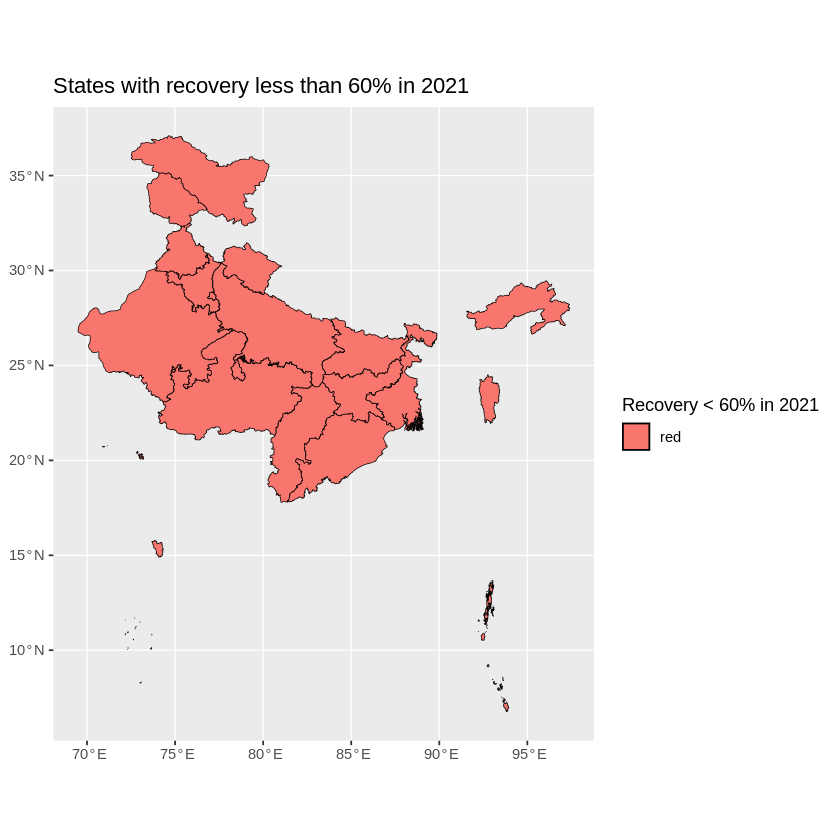

In [22]:
ggplot() +
  geom_sf(data=Merged_data_recovery,
           	aes(fill="red"),
      	     color = "black") + guides(fill=guide_legend(title="Recovery < 60% in 2021")) +
               labs(title="States with recovery less than 60% in 2021")
ggsave("States with recovery less than 60% in 2021.png",dpi = 300, width = 10, height = 10, units = "cm")

## **Q4 Which states have maximum unrecovered cases till 2021?**

In [ ]:
india <- st_read('India_State_Boundary.shp')

In [ ]:
fortify_shape = fortify(india, region = "Name")

In [25]:
State_data <- subset(df,select=c("State.UT","Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total"),Year==2021)
colnames(State_data)[1] <- "Name"

In [26]:
State_data$Name[State_data$Name== "A & N Islands"] <- "Andaman & Nicobar"
State_data$Name[State_data$Name=="D&N Haveli and Daman and Diu"] <- "Daman and Diu and Dadra and Nagar Haveli"      
State_data$Name[State_data$Name=="Delhi UT"] <- "Delhi"
State_data$Name[State_data$Name=="Chhattisgarh"] <- "Chhattishgarh"
State_data$Name[State_data$Name=="Telangana"] <- "Telengana"
State_data$Name[State_data$Name=="Jammu & Kashmir"] <- "Jammu and Kashmir"
State_data$Name[State_data$Name=="Tamil Nadu"] <- "Tamilnadu"
State_data

,Name,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total
,<chr>,<int>
145,Andhra Pradesh,6192
146,Arunachal Pradesh,33
147,Assam,1836
148,Bihar,10579
149,Chhattishgarh,18329
150,Goa,870
151,Gujarat,8431
152,Haryana,8879
153,Himachal Pradesh,1392


In [27]:
Merged_data = merge(fortify_shape,State_data, by="Name")
Merged_data

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

Name,Type,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total,geometry
<chr>,<chr>,<int>,<MULTIPOLYGON [°]>
Andaman & Nicobar,Union Territory,251,MULTIPOLYGON (((92.90124 12...
Andhra Pradesh,State,6192,MULTIPOLYGON (((84.67571 19...
Arunachal Pradesh,State,33,MULTIPOLYGON (((96.08538 29...
Assam,State,1836,MULTIPOLYGON (((93.24961 24...
Bihar,State,10579,MULTIPOLYGON (((84.1088 27....
Chandigarh,Union Territory,2185,MULTIPOLYGON (((76.77232 30...
Chhattishgarh,State,18329,MULTIPOLYGON (((83.32707 24...
Daman and Diu and Dadra and Nagar Haveli,Union Territory,108,MULTIPOLYGON (((72.96339 20...
Delhi,Union Territory,34226,MULTIPOLYGON (((77.10591 28...


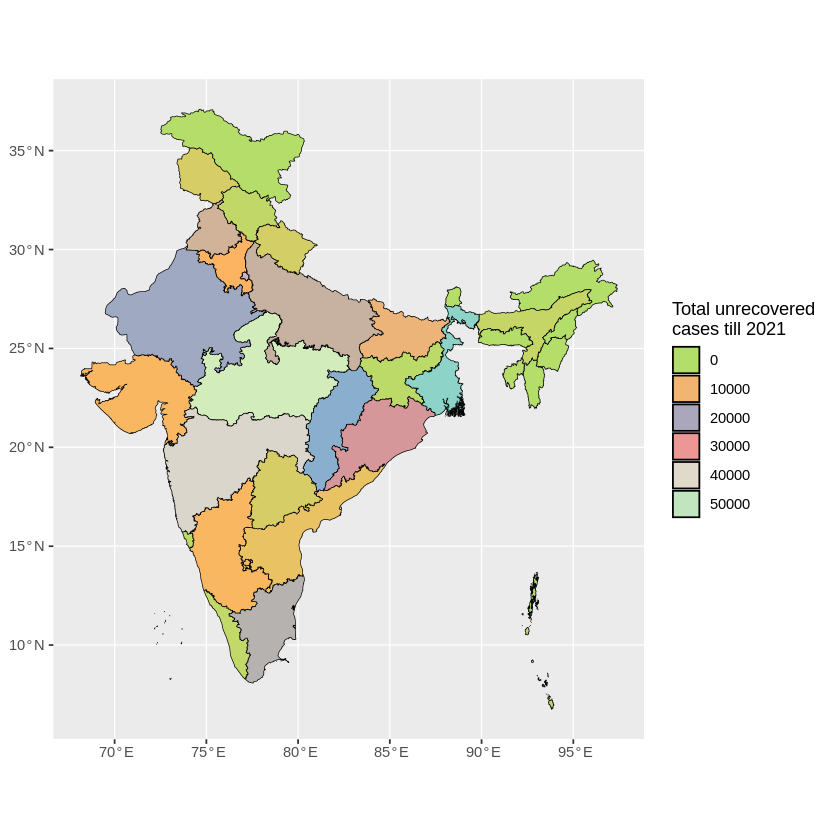

In [28]:
ggplot() +
  geom_sf(data=Merged_data,
           	aes(fill = Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total),
      	     color = "black") + guides(fill=guide_legend(title="Total unrecovered \ncases till 2021")) +  
							 	scale_fill_distiller(palette="Set3")
								 	#scale_fill_continuous(limits=c(0, 60000), breaks=seq(0,60000,by=5000))
ggsave("Total unrecovered cases till 2021.png",dpi = 300, width = 10, height = 10, units = "cm")

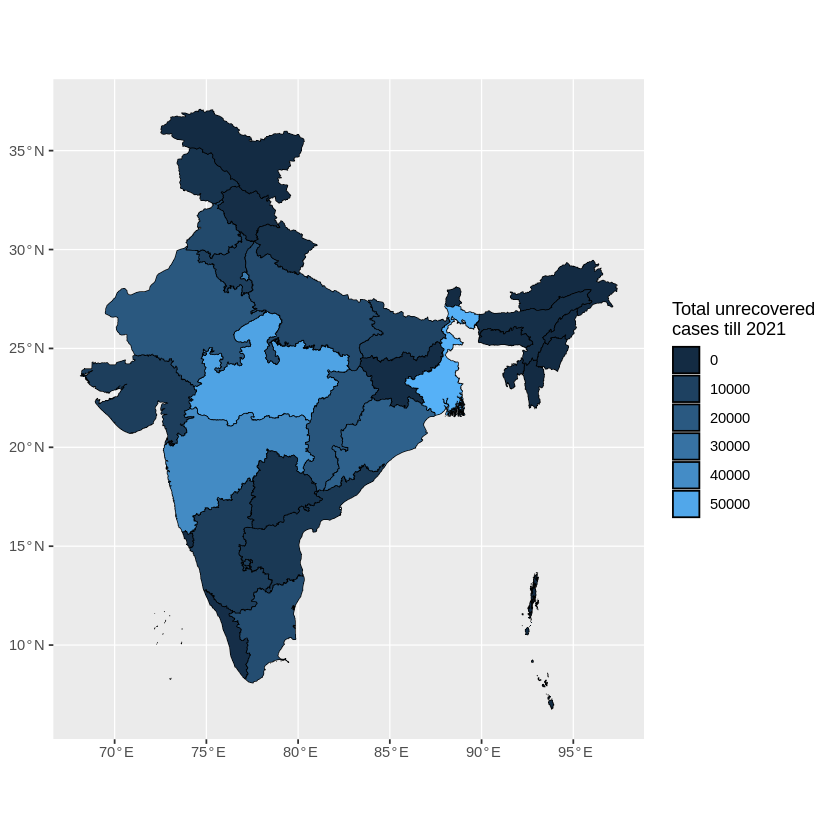

In [30]:
ggplot() +
  geom_sf(data=Merged_data,
           	aes(fill = Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total),
      	     color = "black") + guides(fill=guide_legend(title="Total unrecovered \ncases till 2021")) 
ggsave("Total unrecovered cases till 2021.png",dpi = 300, width = 10, height = 10, units = "cm")

## **Q5 What are the Year-wise and State-wise missing cases, unrecovered and recovery patterns for transgenders**?

### **Year-wise**

In [60]:
trans_year <- subset(df,select=c("Persons.Missing.this.year...Trans","Total.Recovered.Traced.this.year...Trans","Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Trans","Year"))
dim(trans_year)
head(trans_year)

[1] 180   4

,Persons.Missing.this.year...Trans,Total.Recovered.Traced.this.year...Trans,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Trans,Year
,<int>,<int>,<int>,<int>
1,7,7,5,2017
2,0,0,0,2017
3,0,0,0,2017
4,146,104,128,2017
5,0,0,0,2017
6,0,0,0,2017


In [ ]:
trans_grp_year = trans_year %>% group_by(Year)  %>%
                    summarise(total_missing_trans = sum(Persons.Missing.this.year...Trans),
                              total_recovered_trans = sum(Total.Recovered.Traced.this.year...Trans),
                              total_unrecovered_trans = sum(Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Trans),
                              .groups = 'drop')
trans_grp_year

Year,total_missing_trans,total_recovered_trans,total_unrecovered_trans
<int>,<int>,<int>,<int>
2017,418,346,163
2018,564,518,81
2019,40,101,20
2020,27,142,5
2021,186,130,60


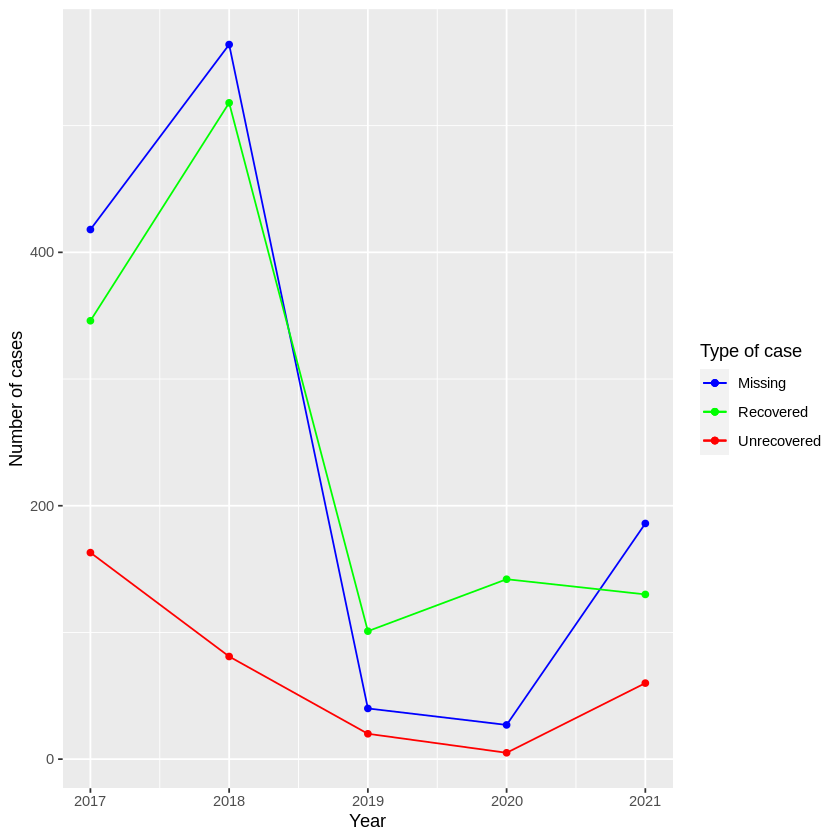

In [ ]:
p<-ggplot(trans_grp_year, aes(x=Year)) +
  geom_line(aes(y=total_missing_trans,color="blue"))+
  geom_point(aes(y=total_missing_trans,color="blue")) +
  geom_line(aes(y=total_recovered_trans,color="green")) +
  geom_point(aes(y=total_recovered_trans,color="green")) +
  geom_line(aes(y=total_unrecovered_trans,color="red")) +
  geom_point(aes(y=total_unrecovered_trans,color="red")) +
  labs(x="Year",y="Number of cases") +
  scale_y_continuous(labels = function(x) format(x, scientific=FALSE)) +
  scale_color_manual(labels = c("Missing", "Recovered","Unrecovered"), values = c("blue","green","red"),name="Type of case")
p

### **State-wise**

In [61]:
trans_state <- subset(df,select=c("Persons.Missing.this.year...Trans","State.UT"))
dim(trans_state)
head(trans_state)

[1] 180   2

,Persons.Missing.this.year...Trans,State.UT
,<int>,<chr>
1,7,Andhra Pradesh
2,0,Arunachal Pradesh
3,0,Assam
4,146,Bihar
5,0,Chhattisgarh
6,0,Goa


In [ ]:
trans_grp_state = trans_state %>% group_by(State.UT)  %>%
                    summarise(total_missing_trans = sum(Persons.Missing.this.year...Trans),
                              .groups = 'drop')
trans_grp_state

State.UT,total_missing_trans
<chr>,<int>
A & N Islands,0
Andhra Pradesh,514
Arunachal Pradesh,0
Assam,20
Bihar,221
Chandigarh,1
Chhattisgarh,0
D&N Haveli,0
D&N Haveli and Daman and Diu,0


In [ ]:
trans_grp_state <-trans_grp_state[-c(8,9,10),]

In [ ]:
trans_grp_state[nrow(trans_grp_state)+1,] <- list("D&N Haveli and Daman and Diu",0)

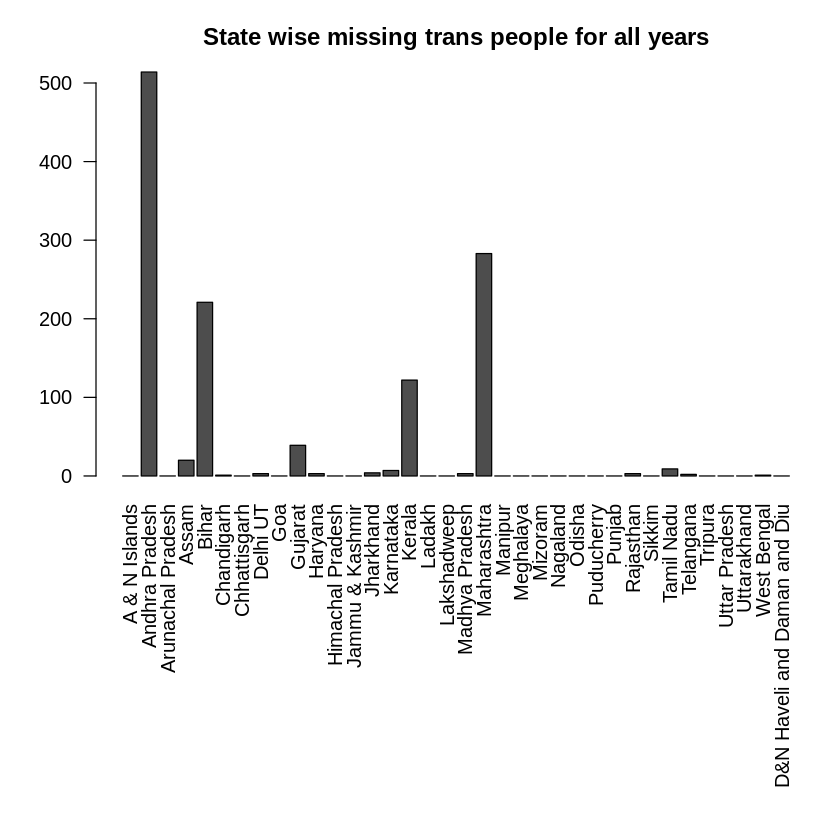

In [ ]:
state <- c("A & N Islands","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chandigarh","Chhattisgarh","Delhi UT","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu & Kashmir","Jharkhand","Karnataka","Kerala","Ladakh","Lakshadweep","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Puducherry","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","D&N Haveli and Daman and Diu")

mx <- t(as.matrix(trans_grp_state[-1]))
colnames(mx) <- trans_grp_state$State.UT

par(mar=c(15, 4,3,1))
barplot(mx, main = "State wise missing trans people for all years", names.arg=state,las=2)   

In [ ]:
trans_grp_state2 <- subset(trans_grp_state,select=c("State.UT","total_missing_trans"),total_missing_trans!=0)
trans_grp_state2

State.UT,total_missing_trans
<chr>,<int>
Andhra Pradesh,514
Assam,20
Bihar,221
Chandigarh,1
Delhi UT,3
Gujarat,39
Haryana,3
Jharkhand,4
Karnataka,7


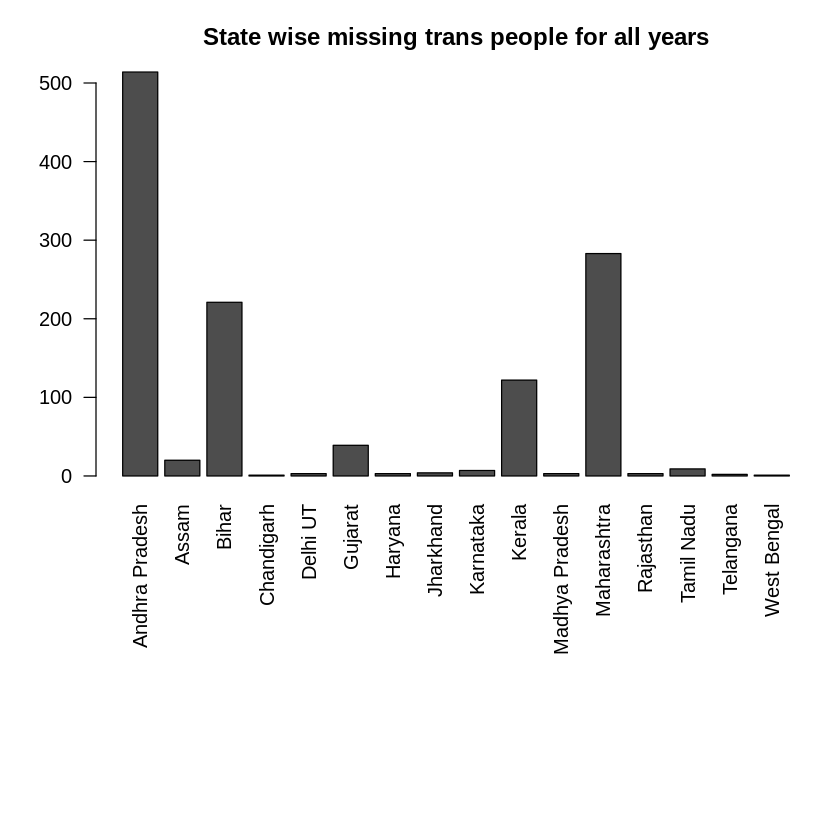

In [ ]:
state <- c("Andhra Pradesh","Assam","Bihar","Chandigarh","Delhi UT","Gujarat","Haryana","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Rajasthan","Tamil Nadu","Telangana","West Bengal")

mx <- t(as.matrix(trans_grp_state2[-1]))
colnames(mx) <- trans_grp_state2$State.UT

par(mar=c(15, 4,3,1))
barplot(mx, main = "State wise missing trans people for all years", names.arg=state,las=2)   